Import libraries

In [1]:
import psycopg2
import geopandas as gpd
import fiona

Establish connection with database

In [2]:
try:
    conn = psycopg2.connect("dbname='infinity' user='lefteris_sergios' host='locations-development-db-2018-05-18.cw0nipflfk4w.us-east-1.rds.amazonaws.com' password='skatoules2018'")
except:
    print(
        "I am unable to connect to the database")

In [3]:
conn

<connection object at 0x0000021C88008DB0; dsn: 'user=lefteris_sergios password=xxx dbname=infinity host=locations-development-db-2018-05-18.cw0nipflfk4w.us-east-1.rds.amazonaws.com', closed: 0>

Run queries to get results as geodataframes

In [4]:
sql = "select * from public.boundaries"

gdf = gpd.GeoDataFrame.from_postgis(sql,conn, geom_col='shape' )

In [5]:
gdf.head()

level                                              shape  \
0      1  (POLYGON ((63.9056 35.876, 63.9047 35.8496, 63...   
1      2  (POLYGON ((68.17 35.0278, 68.17489999999999 35...   
2      1  (POLYGON ((68.31229999999999 36.5509, 68.3188 ...   
3      2  (POLYGON ((62.567 32.3885, 62.5834 32.3945, 62...   
4      1  (POLYGON ((67.0522 37.3629, 67.0701 37.3498, 6...   

                                               lines    title      id  \
0  a:1:{i:0;s:1957:"_`~yE_q`eK~cDrDfiBoZbdCbBz}Bj...  Badghis   AFG_2   
1  a:1:{i:0;s:516:"wjxtEoma_Lj}As]roAw~@~{Bsq@~{B...   Shibar  AFG_49   
2  a:1:{i:0;s:2204:"cza~E{f}_LbQsg@{JoaIg^_eF~Moa...  Baghlan   AFG_3   
3  a:1:{i:0;s:492:"c{tdEwb{|Jod@oeBo{AgvC_qEo~Gg|...    Bakwa  AFG_53   
4  a:1:{i:0;s:1910:"cm`cFgcgxKzpA{nBroA{rEnZwe@fk...    Balkh   AFG_4   

    latmin   latmax   lngmin   lngmax parent  \
0  34.5169  35.9998  62.6278  65.0868  AFG_1   
1  34.6051  35.0834  67.7556  68.2546  AFG_5   
2  34.8796  36.5752  67.2831  69.9782  AFG_1   
3  32.0178  32.5527  62.5670  63.2519  AFG_6   
4  35.5907  37.3910  66.4085  68.2047  AFG_1   

                                                poly  
0  a:1:{i:0;a:386:{i:0;s:15:"35.8760 63.9056";i:1...  
1  a:1:{i:0;a:94:{i:0;s:15:"35.0278 68.1700";i:1;...  
2  a:1:{i:0;a:402:{i:0;s:15:"36.5509 68.3123";i:1...  
3  a:1:{i:0;a:89:{i:0;s:15:"32.3885 62.5670";i:1;...  
4  a:1:{i:0;a:348:{i:0;s:15:"37.3629 67.0522";i:1...

Check data size per level value

In [19]:
print("boundaries table in our database")
print("")
for i in sorted(gdf["level"].unique() ): # sorted to put the array in an order
    print ("For the value: "+ str(i) + " there are: " + str(len(gdf.loc[gdf["level"]==i]) ) )

boundaries table in our database

For the value: 0 there are: 253
For the value: 1 there are: 3378
For the value: 2 there are: 39231
For the value: 3 there are: 98790
For the value: 4 there are: 37710
For the value: 5 there are: 38780


What about the unique values of the shapefile from GADM

In [5]:
import glob, os
os.chdir(r"C:\Users\Lefteris\Desktop\Data\GADM\gadm36_levels_shp")
print("GADM shapefile")
print("")
for file in glob.glob("*.shp"):
    #print(len(gpd.read_file(file))) #read the shapefiles and print their size using geopandas
    print ("For the value: "+ str(file[-5]) + " there are: " + str(len(list(fiona.open(file)))) )

GADM shapefile

For the value: 0 there are: 256
For the value: 1 there are: 3610
For the value: 2 there are: 45962
For the value: 3 there are: 147427
For the value: 4 there are: 138053
For the value: 5 there are: 51427


# More queries

In [4]:
sqll = "select * from public.boundaries where id like '%GBR%' and level=0"
gdff = gpd.GeoDataFrame.from_postgis(sqll,conn, geom_col='shape' )

In [5]:
# count how many polygons within the MultiPolygon
len(gdff['shape'].iloc[0].geoms)

932

In [6]:
sqll = "select * from public.boundaries where id like '%GBR%' and level=1"
gdff = gpd.GeoDataFrame.from_postgis(sqll,conn, geom_col='shape' )

In [7]:
for i in range(len(gdff)):
    print(len(gdff['shape'].iloc[i].geoms))

73
127
37
697


In [8]:
class show_polygons_within_multi:
    
    import geopandas as gpd
    def sql_con():
        try:
            conn = psycopg2.connect("dbname='infinity' user='lefteris_sergios' host='locations-development-db-2018-05-18.cw0nipflfk4w.us-east-1.rds.amazonaws.com' password='skatoules2018'")
        except:
            print("I am unable to connect to the database")
        
    def __init__(self,level):
        self.level = level
        self.description = "this is a geodataframe"
        
    def show_gdf(level):
        sql = "select * from public.boundaries where id like '%GBR%' and level={}".format(level)
        gdf = gpd.GeoDataFrame.from_postgis(sql,conn, geom_col='shape' )
        return gdf
    
    def show_mlt_plg(level):
        sql = "select * from public.boundaries where id like '%GBR%' and level={}".format(level)
        gdf = gpd.GeoDataFrame.from_postgis(sql,conn, geom_col='shape' )
        return len(gdf)
    
    def show_plg(level):
        sql = "select * from public.boundaries where id like '%GBR%' and level={}".format(level)
        gdf = gpd.GeoDataFrame.from_postgis(sql,conn, geom_col='shape' )
        # create an empty dictionary
        diction ={}
        for i in range(len(gdf)):
            # append with key the title of the feature and value the number of polygons within the multi polygon
            diction[gdf['title'].iloc[i]]=len(gdf['shape'].iloc[i].geoms)
        return diction

In [9]:
show_polygons_within_multi.show_plg(2)

{'Aberdeen': 1,
 'Aberdeenshire': 1,
 'Anglesey': 5,
 'Angus': 1,
 'Antrim': 1,
 'Ards': 29,
 'Argyll and Bute': 164,
 'Armagh': 1,
 'Ballymena': 1,
 'Ballymoney': 1,
 'Banbridge': 1,
 'Belfast': 1,
 'Bexley': 1,
 'Blackburn with Darwen': 1,
 'Blaenau Gwent': 1,
 'Bournemouth': 1,
 'Brent': 1,
 'Bridgend': 1,
 'Brighton and Hove': 1,
 'Bristol': 1,
 'Bromley': 1,
 'Buckinghamshire': 1,
 'Caerphilly': 1,
 'Cambridgeshire': 1,
 'Camden': 1,
 'Cardiff': 1,
 'Carmarthenshire': 1,
 'Carrickfergus': 1,
 'Castlereagh': 1,
 'Ceredigion': 3,
 'Cheshire': 1,
 'Clackmannanshire': 1,
 'Coleraine': 3,
 'Conwy': 1,
 'Cookstown': 1,
 'Cornwall': 50,
 'Craigavon': 1,
 'Croydon': 1,
 'Cumbria': 3,
 'Darlington': 1,
 'Denbighshire': 1,
 'Derby': 1,
 'Derbyshire': 1,
 'Derry': 1,
 'Devon': 5,
 'Dorset': 7,
 'Down': 19,
 'Dumfries and Galloway': 8,
 'Dundee': 1,
 'Dungannon': 1,
 'Durham': 1,
 'Ealing': 1,
 'East Ayrshire': 1,
 'East Dunbartonshire': 1,
 'East Lothian': 4,
 'East Renfrewshire': 1,
 'East 

In [10]:
show_polygons_within_multi.show_mlt_plg(2)

188

In [11]:
# make the connection
show_polygons_within_multi.sql_con()

In [12]:
# create a geodataframe
gbr_gdf = show_polygons_within_multi.show_gdf(2)

In [13]:
# check the head of fgdf
gbr_gdf.head(6)

level                                              shape  \
0      2  (POLYGON ((-2.5044 53.627, -2.5131 53.6358, -2...   
1      2  (POLYGON ((-1.9203 50.75, -1.9152 50.7532, -1....   
2      2  (POLYGON ((-6.9174 54.8158, -6.9188 54.8016, -...   
3      2  (POLYGON ((0.1661 51.5065, 0.178 51.5018, 0.18...   
4      2  (POLYGON ((-6.2104 54.4332, -6.1663 54.4441, -...   
5      2  (POLYGON ((-5.9136 54.6465, -5.9124 54.6429, -...   

                                               lines                  title  \
0  a:1:{i:0;s:114:"w_ifInchN_v@ju@smBbrAgdGzO_uCs...  Blackburn with Darwen   
1  a:1:{i:0;s:81:"obwtHz`vJ_S{^?__DfJgxBnZciC~u@c...            Bournemouth   
2  a:1:{i:0;s:567:"weqmIv`fi@vwAvGfkA_|Bvj@sNbj@~...               Strabane   
3  a:1:{i:0;s:158:"szjyHcm_@j\kiAvmA_Sf^sg@bBsrBc...                 Bexley   
4  a:1:{i:0;s:283:"onfkI~}{d@ccAsrGn}@_DkRwqDfyDg...              Banbridge   
5  a:1:{i:0;s:293:"scplI~~ac@nUoFrDs`AvLkWj\vLz@b...                Belfast   

        id   latmin   latmax  lngmin  lngmax parent  \
0    GBR_6  53.6241  53.7726 -2.5291 -2.3565  GBR_1   
1    GBR_7  50.7134  50.7532 -1.9285 -1.7919  GBR_1   
2  GBR_138  54.6008  54.9437 -7.9122 -6.8963  GBR_2   
3    GBR_5  51.3985  51.5119  0.0803  0.2246  GBR_1   
4  GBR_118  54.2422  54.4441 -6.4052 -5.9377  GBR_2   
5  GBR_119  54.5402  54.6630 -6.0658 -5.8077  GBR_2   

                                                poly      area  
0  a:1:{i:0;a:21:{i:0;s:15:"53.6270 -2.5044";i:1;...  139.5530  
1  a:1:{i:0;a:16:{i:0;s:15:"50.7500 -1.9203";i:1;...   28.3135  
2  a:1:{i:0;a:103:{i:0;s:15:"54.8158 -6.9174";i:1...  860.6540  
3  a:1:{i:0;a:30:{i:0;s:14:"51.5065 0.1661";i:1;s...   68.3614  
4  a:1:{i:0;a:53:{i:0;s:15:"54.4332 -6.2104";i:1;...  461.9480  
5  a:1:{i:0;a:59:{i:0;s:15:"54.6465 -5.9136";i:1;...  116.2560

In [14]:
# print the areas of the features
gbr_gdf['area'].head()

0    139.5530
1     28.3135
2    860.6540
3     68.3614
4    461.9480
Name: area, dtype: float64

In [15]:
# add all the areas of the boundaries db in a list
areas = gbr_gdf['area'].tolist()

C:\Users\Lefteris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Distribution')

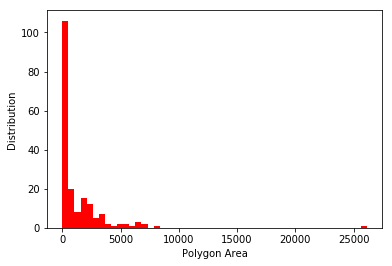

In [59]:
# plot a histogram to check the distribution of the areas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(areas,normed=False, bins=50, color="red")
plt.xlabel('Polygon Area')
plt.ylabel('Distribution')

In [17]:
# lets plot the distribution of areas of the shapefile of GADM level 2
gadm_level2 = gpd.read_file(r"C:\Users\Lefteris\Desktop\Data\GADM\gadm36_levels_shp\gadm36_2.shp")

In [75]:
# show only the ones where GID_0 contains GBR
gadm_level2_GBR = gadm_level2.loc[gadm_level2["GID_0"].str.contains("GBR")]
gadm_level2_GBR.head()

GID_0          NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2  \
14623   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.1_1   
14624   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.2_1   
14625   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.3_1   
14626   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.4_1   
14627   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.5_1   

                             NAME_2                        VARNAME_2  \
14623                      Barnsley                             None   
14624  Bath and North East Somerset                             None   
14625                  Bedfordshire                             None   
14626                    Birmingham                             None   
14627         Blackburn with Darwen  Blackburn, Blackburn and Darwen   

      NL_NAME_2                       TYPE_2                    ENGTYPE_2  \
14623      None         Metropolitan Borough         Metropolitan Borough   
14624      None            Unitary Authority            Unitary Authority   
14625      None        Administrative County                         None   
14626      None  Metropolitan Borough (City)  Metropolitan Borough (City)   
14627      None            Unitary Authority            Unitary Authority   

       CC_2 HASC_2                                           geometry  
14623  None  GB.BX  POLYGON ((-1.78996992 53.47292709, -1.79305696...  
14624  None  GB.BN  POLYGON ((-2.68629479 51.31516266, -2.68065643...  
14625  None  GB.CB  POLYGON ((-0.58507907 52.11363983, -0.58805799...  
14626  None  GB.BI  POLYGON ((-1.73416984 52.51014328, -1.73984325...  
14627  None  GB.BW  POLYGON ((-2.51111197 53.63376617, -2.5131681 ...

In [33]:
# since we know that this geodataframe falls within UK we can reproject it to British National Grid
proj_gadm_level2_GBR = gadm_level2_GBR.to_crs({'init' :'epsg:27700'})

In [69]:
# add the area values in a list and divide by 1000000 to convert from square meters to square kilometers
areas_gadm = proj_gadm_level2_GBR['geometry'].area.tolist()
areas_gadm = [i/1000000 for i in areas_gadm]

C:\Users\Lefteris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Distribution')

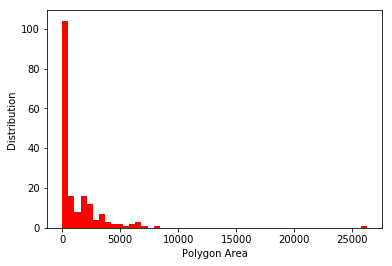

In [73]:
plt.hist(areas_gadm,normed=False, bins=50, color="red")
plt.xlabel('Polygon Area')
plt.ylabel('Distribution')

both histograms look alike. That should tell us something. 